In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility"
# errors are ok, per https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

In [2]:
pd.options.display.max_rows = 100

In [3]:
file_prefix = '../data/362070167_T_ONTIME-'
file_month_range = range(1,3)
#file_month_range = range(1,13)

In [4]:
dtypes_bts = {
    'CARRIER': 'category'
    ,'TAIL_NUM': 'category'
    ,'ORIGIN': 'category'
    ,'ORIGIN_CITY_NAME': 'category'
    ,'DEST': 'category'
    ,'DEST_CITY_NAME': 'category'
    ,'CANCELLATION_CODE': 'category'}

In [5]:
d_bts_by_month = []
for month_index in file_month_range:
    d_bts_by_month.append(pd.read_csv(f'{file_prefix}{month_index}.csv', dtype=dtypes_bts))

In [6]:
for idx, d_month in enumerate(d_bts_by_month):
    print(idx, d_month.shape)

0 (450017, 34)
1 (410517, 34)


In [7]:
d_bts = pd.concat(d_bts_by_month, ignore_index=True)
d_bts.shape

(860534, 34)

Even if we read the data individually as categories, we don't retain that type after the concat for every field (probably because the fields have different unique values). We can get back to the categorical type, and a smaller dataframe, by reapplying the type.

In [8]:
for field in dtypes_bts:
    d_bts[field] = d_bts[field].astype(dtypes_bts[field])

And we'll get a datetime too.

In [9]:
d_bts['FL_DATE'] = pd.to_datetime(d_bts['FL_DATE'])

In [10]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [11]:
mem_usage(d_bts)

'187.65 MB'

In [12]:
d_bts.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                       category
ORIGIN_CITY_NAME             category
DEST                         category
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

In [13]:
d_bts[:1]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,147.0,121.0,1.0,802.0,NaN,NaN,NaN,NaN,NaN,NaN


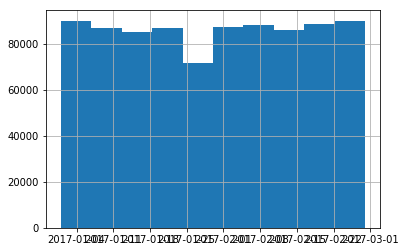

In [14]:
d_bts['FL_DATE'].hist()

# Airports - additional data

In [15]:
dtypes_airports = {
    'Name': 'category'
    ,'City': 'category'
    ,'Country': 'category'
    ,'IATA': 'category'
    ,'ICAO': 'category'
    ,'Timezone': 'category'
    ,'DST': 'category'
    ,'TzTimezone': 'category'
    ,'Type': 'category'
    ,'Source': 'category'}

In [16]:
d_airports = pd.read_csv('../data/airports.csv', dtype=dtypes_airports)
d_airports.shape

(7184, 14)

In [17]:
[d_bts.dtypes, d_airports.dtypes]

[FL_DATE                datetime64[ns]
 CARRIER                      category
 TAIL_NUM                     category
 FL_NUM                          int64
 ORIGIN                       category
 ORIGIN_CITY_NAME             category
 DEST                         category
 DEST_CITY_NAME               category
 CRS_DEP_TIME                    int64
 DEP_TIME                      float64
 DEP_DELAY                     float64
 DEP_DELAY_NEW                 float64
 TAXI_OUT                      float64
 WHEELS_OFF                    float64
 WHEELS_ON                     float64
 TAXI_IN                       float64
 CRS_ARR_TIME                    int64
 ARR_TIME                      float64
 ARR_DELAY                     float64
 ARR_DELAY_NEW                 float64
 CANCELLED                     float64
 CANCELLATION_CODE            category
 DIVERTED                      float64
 CRS_ELAPSED_TIME              float64
 ACTUAL_ELAPSED_TIME           float64
 AIR_TIME                

In [18]:
d = pd.merge(left=d_bts, right=d_airports, how='left', left_on='ORIGIN', right_on='IATA')
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzTimezone,Type,Source
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,ORD,KORD,41.978600,-87.904800,672.0,-6,A,America/Chicago,airport,OurAirports
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,LAS,KLAS,36.080101,-115.152000,2181.0,-8,A,America/Los_Angeles,airport,OurAirports
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,DCA,KDCA,38.852100,-77.037697,15.0,-5,A,America/New_York,airport,OurAirports


In [19]:
d.iloc[0]

FL_DATE                                 2017-01-01 00:00:00
CARRIER                                                  AA
TAIL_NUM                                             N153AA
FL_NUM                                                 1766
ORIGIN                                                  ORD
ORIGIN_CITY_NAME                                Chicago, IL
DEST                                                    DFW
DEST_CITY_NAME                        Dallas/Fort Worth, TX
CRS_DEP_TIME                                            710
DEP_TIME                                                705
DEP_DELAY                                                -5
DEP_DELAY_NEW                                             0
TAXI_OUT                                                 12
WHEELS_OFF                                              717
WHEELS_ON                                               918
TAXI_IN                                                  14
CRS_ARR_TIME                            

In [20]:
d = pd.merge(left=d, right=d_airports, how='left', left_on='DEST', right_on='IATA', suffixes=['_orig','_dest'])
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,IATA_dest,ICAO_dest,Latitude_dest,Longitude_dest,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports


In [21]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [22]:
[d_bts.dtypes, d_airports.dtypes]

[FL_DATE                datetime64[ns]
 CARRIER                      category
 TAIL_NUM                     category
 FL_NUM                          int64
 ORIGIN                       category
 ORIGIN_CITY_NAME             category
 DEST                         category
 DEST_CITY_NAME               category
 CRS_DEP_TIME                    int64
 DEP_TIME                      float64
 DEP_DELAY                     float64
 DEP_DELAY_NEW                 float64
 TAXI_OUT                      float64
 WHEELS_OFF                    float64
 WHEELS_ON                     float64
 TAXI_IN                       float64
 CRS_ARR_TIME                    int64
 ARR_TIME                      float64
 ARR_DELAY                     float64
 ARR_DELAY_NEW                 float64
 CANCELLED                     float64
 CANCELLATION_CODE            category
 DIVERTED                      float64
 CRS_ELAPSED_TIME              float64
 ACTUAL_ELAPSED_TIME           float64
 AIR_TIME                

In [23]:
mem_usage(d)

'373.86 MB'

In [24]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                         object
ORIGIN_CITY_NAME             category
DEST                           object
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

# Carriers - additional data

In [25]:
# d_carriers = pd.read_csv('../data/CarrierLookup.csv')
# d_carriers.shape

In [26]:
# d = pd.merge(left=d, right=d_carriers, left_on='CARRIER', right_on='Code')
# d[:3]

In [27]:
# d.iloc[0]

In [28]:
dtypes_carriers = {
    'Code': 'category'
    ,'Description': 'category'}

In [29]:
d_carriers_unique = pd.read_csv('../data/UniqueCarrierLookup.csv', dtype=dtypes_carriers)
d_carriers_unique.shape

(1645, 2)

In [30]:
d = pd.merge(left=d, right=d_carriers_unique, left_on='CARRIER', right_on='Code')
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,Latitude_dest,Longitude_dest,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest,Code,Description
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc.
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc.
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports,AA,American Airlines Inc.


In [31]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [32]:
d['CARRIER'].value_counts(dropna=False)

WN    203526
AA    140255
DL    135126
OO     97099
UA     82407
EV     65481
B6     47113
AS     28057
NK     24013
F9     14470
HA     12065
VX     10922
Name: CARRIER, dtype: int64

In [33]:
mem_usage(d)

'425.04 MB'

In [34]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                        object
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                         object
ORIGIN_CITY_NAME             category
DEST                           object
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

For some reason (that I could figure out, but I'm not going to spend the time on - something about the join, since the ORIG and DEST fields that we use on the join above are similarly changed) the last join clobbers the categorical dtype on a few of the BTS fields. I'll reapply it here.

In [35]:
for field in dtypes_bts:
    d[field] = d[field].astype(dtypes_bts[field])

In [36]:
d.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                       category
ORIGIN_CITY_NAME             category
DEST                         category
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

In [37]:
mem_usage(d)

'282.30 MB'

In [43]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

# Filter down joined data to only fields we need, rename to be consistent

In [139]:
d_filtered = d[['FL_DATE','ORIGIN','ORIGIN_CITY_NAME','DEST','DEST_CITY_NAME',
                'CRS_DEP_TIME','DEP_TIME','DEP_DELAY','DEP_DELAY_NEW',
                'CRS_ARR_TIME','ARR_TIME','ARR_DELAY','ARR_DELAY_NEW',
                'CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME',
                'FLIGHTS','Name_orig','Latitude_orig','Longitude_orig',
                'Name_dest','Latitude_dest','Longitude_dest','Description']].copy()
d_filtered[:2]

,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,CRS_ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,FLIGHTS,Name_orig,Latitude_orig,Longitude_orig,Name_dest,Latitude_dest,Longitude_dest,Description
0,2017-01-01,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,-5.0,0.0,948,...,158.0,147.0,1.0,Chicago O'Hare International Airport,41.978600,-87.9048,Dallas Fort Worth International Airport,32.896801,-97.038002,American Airlines Inc.
1,2017-01-01,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,0.0,0.0,1718,...,163.0,162.0,1.0,McCarran International Airport,36.080101,-115.1520,Dallas Fort Worth International Airport,32.896801,-97.038002,American Airlines Inc.


In [143]:
d_filtered.rename(columns={'FL_DATE':'FlightDate','ORIGIN':'OriginCode','ORIGIN_CITY_NAME':'OriginCity',
                           'DEST':'DestCode','DEST_CITY_NAME':'DestCity','CRS_DEP_TIME':'DepTimeScheduled',
                           'DEP_TIME':'DepTimeActual','DEP_DELAY':'DepDelay','DEP_DELAY_NEW':'DepDelayCapped',
                           'CRS_ARR_TIME':'ArrTimeScheduled','ARR_TIME':'ArrTimeActual','ARR_DELAY':'ArrDelay',
                           'ARR_DELAY_NEW':'ArrDelayCapped','CANCELLED':'Cancelled','DIVERTED':'Diverted',
                           'CRS_ELAPSED_TIME':'TotalTimeScheduled','ACTUAL_ELAPSED_TIME':'TotalTimeActual',
                           'FLIGHTS':'Flights','Name_orig':'OriginAirport','Latitude_orig':'OriginLatitude',
                           'Longitude_orig':'OriginLongitude','Name_dest':'DestAirport',
                           'Latitude_dest':'DestLatitude','Longitude_dest':'DestLongitude',
                           'Description':'Carrier'}, inplace=True)
d_filtered.iloc[0]

FlightDate                                2017-01-01 00:00:00
OriginCode                                                ORD
OriginCity                                        Chicago, IL
DestCode                                                  DFW
DestCity                                Dallas/Fort Worth, TX
DepTimeScheduled                                          710
DepTimeActual                                             705
DepDelay                                                   -5
DepDelayCapped                                              0
ArrTimeScheduled                                          948
ArrTimeActual                                             932
ArrDelay                                                  -16
ArrDelayCapped                                              0
Cancelled                                                   0
Diverted                                                    0
TotalTimeScheduled                                        158
TotalTim

# And, finally, dump to a single file

In [144]:
d_filtered.to_csv('../data/flights.csv', index=False)

# Paths for maps linking airports

In [68]:
d_paths_data = d.groupby(['ORIGIN','DEST','ORIGIN_CITY_NAME','DEST_CITY_NAME',
           'Name_orig','Name_dest',
           'Latitude_orig','Longitude_orig',
           'Latitude_dest','Longitude_dest'], as_index=True).size().reset_index()
d_paths_data.rename(columns={0:'CountOfFlights'}, inplace=True)
d_paths_data[:5]

,ORIGIN,DEST,ORIGIN_CITY_NAME,DEST_CITY_NAME,Name_orig,Name_dest,Latitude_orig,Longitude_orig,Latitude_dest,Longitude_dest,CountOfFlights
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",Lehigh Valley International Airport,Hartsfield Jackson Atlanta International Airport,40.652100,-75.440804,33.636700,-84.428101,128
1,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",Lehigh Valley International Airport,Detroit Metropolitan Wayne County Airport,40.652100,-75.440804,42.212399,-83.353401,113
2,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",Lehigh Valley International Airport,Chicago O'Hare International Airport,40.652100,-75.440804,41.978600,-87.904800,78
3,ABI,DFW,"Abilene, TX","Dallas/Fort Worth, TX",Abilene Regional Airport,Dallas Fort Worth International Airport,32.411301,-99.681900,32.896801,-97.038002,41
4,ABQ,ATL,"Albuquerque, NM","Atlanta, GA",Albuquerque International Sunport Airport,Hartsfield Jackson Atlanta International Airport,35.040199,-106.609001,33.636700,-84.428101,94


In [86]:
foo = list(d_paths_data[:1].itertuples(index=False))
foo

[Pandas(ORIGIN='ABE', DEST='ATL', ORIGIN_CITY_NAME='Allentown/Bethlehem/Easton, PA', DEST_CITY_NAME='Atlanta, GA', Name_orig='Lehigh Valley International Airport', Name_dest='Hartsfield Jackson Atlanta International Airport', Latitude_orig=40.652099609375, Longitude_orig=-75.44080352783203, Latitude_dest=33.63669967651367, Longitude_dest=-84.4281005859375, CountOfFlights=128)]

In [92]:
foo[0].ORIGIN

'ABE'

In [127]:
d_path_rows = []
for index, flight in enumerate(d_paths_data.itertuples(index=False)):
    path_id = f'{flight.ORIGIN}-{flight.DEST}'
    origin = {'PathId':path_id, 'IATA':flight.ORIGIN, 'City':flight.ORIGIN_CITY_NAME, 
              'Airport':flight.Name_orig, 'Latitude':flight.Latitude_orig, 
              'Longitude':flight.Longitude_orig, 'CountOfFlights':flight.CountOfFlights,
              'PointOrder':0}
    dest = {'PathId':path_id, 'IATA':flight.DEST, 'City':flight.DEST_CITY_NAME, 
            'Airport':flight.Name_dest, 'Latitude':flight.Latitude_dest, 
            'Longitude':flight.Longitude_dest, 'CountOfFlights':0,
            'PointOrder':1}
    d_path_rows.append(origin)
    d_path_rows.append(dest)
    
d_paths = pd.DataFrame(d_path_rows)

In [128]:
d_paths[:4]

,Airport,City,CountOfFlights,IATA,Latitude,Longitude,PathId,PointOrder
0,Lehigh Valley International Airport,"Allentown/Bethlehem/Easton, PA",128,ABE,40.652100,-75.440804,ABE-ATL,0
1,Hartsfield Jackson Atlanta International Airport,"Atlanta, GA",0,ATL,33.636700,-84.428101,ABE-ATL,1
2,Lehigh Valley International Airport,"Allentown/Bethlehem/Easton, PA",113,ABE,40.652100,-75.440804,ABE-DTW,0
3,Detroit Metropolitan Wayne County Airport,"Detroit, MI",0,DTW,42.212399,-83.353401,ABE-DTW,1


In [129]:
d_paths.to_csv('../data/flight_paths.csv', index=False)